In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

2024-10-19 12:45:54.685145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 12:45:54.687530: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 12:45:54.695496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 12:45:54.709262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 12:45:54.713395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 12:45:54.723709: I tensorflow/core/platform/cpu_feature_gu

In [1]:
directorytrainig='/home/tarnished/Desktop/bootcampIA/dataset_animals/Training'
directorytesting='/home/tarnished/Desktop/bootcampIA/dataset_animals/Testing'

IMG_SIZE = (160, 160)
BATCH_SIZE = 32

In [4]:
train_dataset = image_dataset_from_directory(directory=directorytrainig, shuffle= True, batch_size= BATCH_SIZE, image_size=IMG_SIZE, seed=42, validation_split=0.2, subset='training')

test_dataset = image_dataset_from_directory(directory=directorytesting, shuffle= True, batch_size= BATCH_SIZE, image_size=IMG_SIZE, seed=42, validation_split=0.2, subset='validation')

Found 1238 files belonging to 4 classes.
Using 991 files for training.
Found 326 files belonging to 4 classes.
Using 65 files for validation.


I0000 00:00:1729359959.163464   54106 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 12:45:59.168347: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
class_names = train_dataset.class_names
print(class_names)

['bears', 'crows', 'elephants', 'rats']


2024-10-19 12:46:08.851271: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


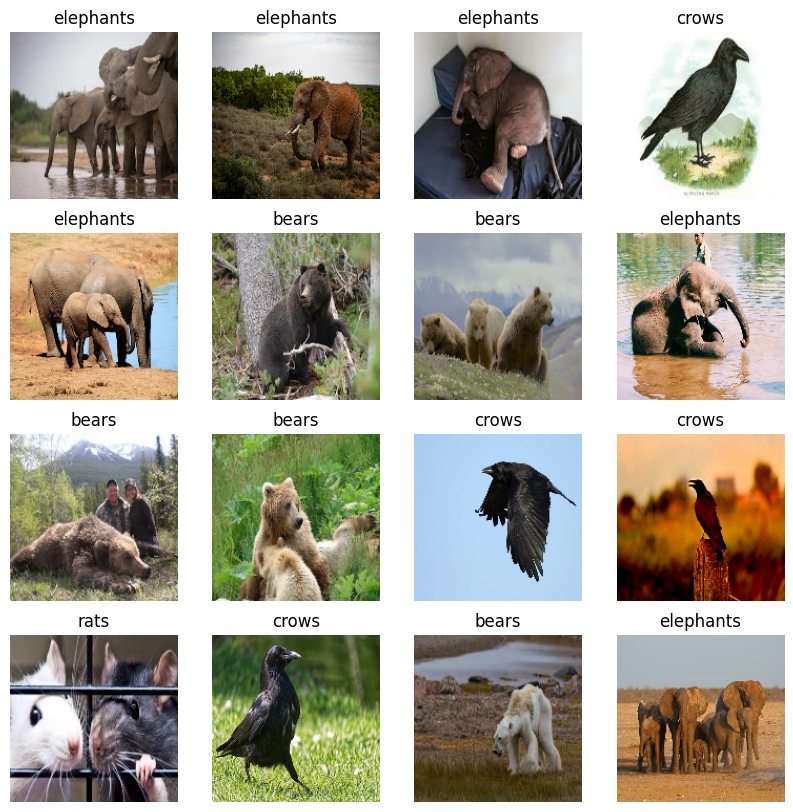

In [6]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.show()

In [7]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.20),
    keras.layers.RandomZoom(0.20)
])


2024-10-19 12:46:24.690031: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


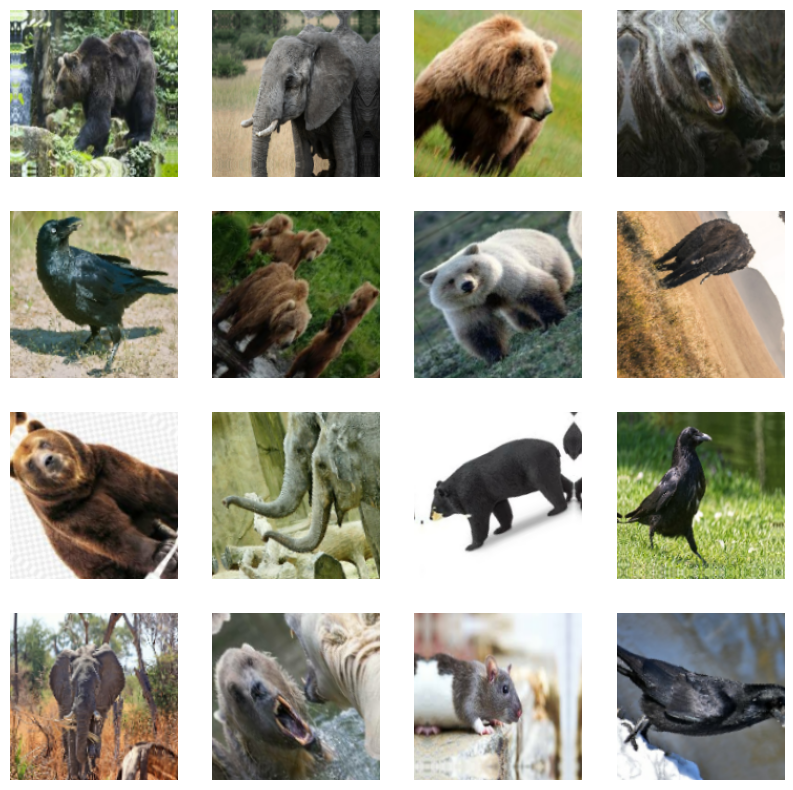

In [8]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    img_augmented = data_augmentation(images)
    plt.imshow(img_augmented[i].numpy().astype('uint8'))
    plt.axis('off')

plt.show()

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [10]:
num_clases = 4

In [11]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    Conv2D(32, 3, strides=2,padding='same',activation='relu',input_shape=(160,160,3)),
    MaxPooling2D(),
    Conv2D(64,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(256,3,strides=2,padding='same',activation='relu'),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(num_clases)
])

/home/tarnished/Desktop/bootcampIA/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
model.fit(train_dataset,validation_data=test_dataset, epochs=100)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3269 - loss: 1.3702 - val_accuracy: 0.2615 - val_loss: 1.3607
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3160 - loss: 1.3268 - val_accuracy: 0.2923 - val_loss: 1.3914
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4227 - loss: 1.2524 - val_accuracy: 0.6000 - val_loss: 1.0767
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5534 - loss: 1.0885 - val_accuracy: 0.5077 - val_loss: 1.0516
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5455 - loss: 0.9982 - val_accuracy: 0.5385 - val_loss: 0.9163
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6238 - loss: 0.8978 - val_accuracy: 0.6462 - val_loss: 0.9444
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6013 - loss: 0.9354 - val_accuracy: 0.7385 - val_loss: 0.7405
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6663 - loss: 0.8271 - val_accuracy: 0.

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 80, 80, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 40, 40, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 20, 20, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 10, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 5, 5, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 2, 2, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 1, 1, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 100)              │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,243,562 (4.74 MB)

 Trainable params: 414,520 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 829,042 (3.16 MB)

In [15]:
model.evaluate(test_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.2480 


[0.24345985054969788, 0.892307698726654]

In [16]:
prediccionesconvolucion = model.predict(test_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


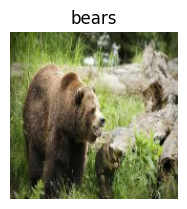

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Probabilidad de pertenecer a bears con precisión del 49.95


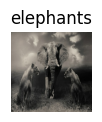

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a elephants con precisión del 99.83


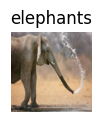

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Probabilidad de pertenecer a elephants con precisión del 99.98


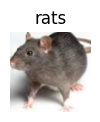

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probabilidad de pertenecer a rats con precisión del 99.97


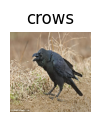

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Probabilidad de pertenecer a crows con precisión del 100.00


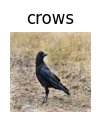

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Probabilidad de pertenecer a crows con precisión del 100.00


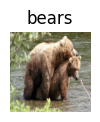

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a bears con precisión del 100.00


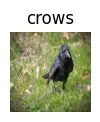

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a crows con precisión del 100.00


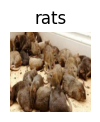

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Probabilidad de pertenecer a elephants con precisión del 93.54


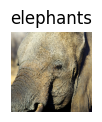

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a elephants con precisión del 99.86


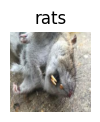

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a elephants con precisión del 63.34


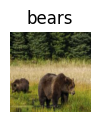

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Probabilidad de pertenecer a bears con precisión del 93.83


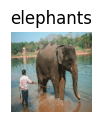

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilidad de pertenecer a elephants con precisión del 99.35


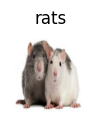

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Probabilidad de pertenecer a rats con precisión del 99.87


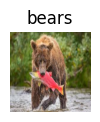

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Probabilidad de pertenecer a bears con precisión del 99.96


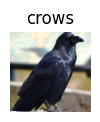

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Probabilidad de pertenecer a crows con precisión del 99.98


In [17]:
plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predicciones = model.predict(img_array)
    score = tf.nn.softmax(predicciones[0])
    print("Probabilidad de pertenecer a {} con precisión del {:.2f}".format(class_names[tf.argmax(score)],100*tf.reduce_max(score)))
